# 感知机

前向传播 反向传播 链式法则

# 超平面

# 导入包并设定画图尺寸

In [4]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
plt.rcParams['font.sans-serif']=['SimHei']#用来正常显示中文标签
plt.rcParams['axes.unicode_minus']=False #用来正常显示负号
plt.rcParams['figure.figsize']=(8.0,6.0)#生成图的大小

## 随机产生数据

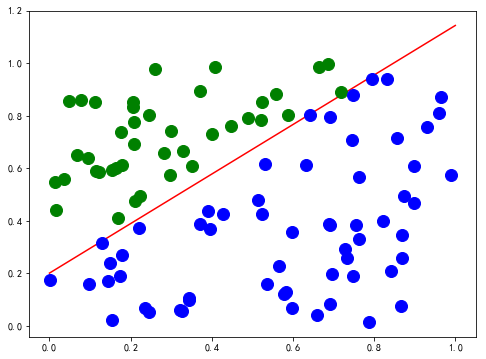

In [7]:
#产生新画布
fig=plt.figure()
#获取当前画布
figa=plt.gca()

#产生100个点
N=100
xn=np.random.rand(N,2)
x=np.linspace(0,1)#shift +Tab可以查看代码的用法

#随机产生一条线
a=np.random.rand()
b=np.random.rand()
f=lambda x:a*x+b
plt.plot(x,f(x),'r')

#线性分割前面产生的点
yn=np.zeros([N,1])

for i in range(N):
    if(f(xn[i,0])>=xn[i,1]):
        #Point is below line
        yn[i]=1
        plt.plot(xn[i,0],xn[i,1],'bo',markersize=12)
    else:
        #Point is above line
        yn[i]=-1
        plt.plot(xn[i,0],xn[i,1],'go',markersize=12)

#plt.legend(['分割线','类一','类二'],loc=2)
#plt.title('随机数生成及展示')
        

# 超平面的实现

In [8]:
def perceptron(xn,yn,MaxIter=1000,a=0.1,w=np.zeros(3)):
    '''
        实现一个二维感知机
        对于给定的(x,y),感知机将通过迭代寻找最佳的超平面来进行分类
        
        输入：
            xn:数据点 Nx2 向量
            yn:分类结果 Nx1 向量
            MaxIter:最大迭代次数（可选参数）
            a:学习率（可选参数）
            w:初始值（可选参数).
            
        输出：
            w:超平面参数使得y=ax+b 最好地分割平面
        注意：
            由于初始值为随机选取，因此迭代到收敛可能需要一点时间，
            该函数仅为感知机的简单实现，实际实现需要考虑更多内容
    '''
    N=xn.shape[0]
    #生成超平面
    f=lambda x:np.sign(w[0]*1+w[1]*x[0]+w[2]*x[1])
    
    for _ in range(MaxIter):
        i=np.random.randint(N)
        #如果分类没有完全准确，则进行调整，反向传播
        if(yn[i]!=f(xn[i,:])):
            w[0]=w[0]+yn[i]*1*a;
            w[1]=w[1]+yn[i]*xn[i,0]*a
            w[2]=w[2]*yn[i]*xn[i,1]*a
    return w

# 实际应用

C:\Users\ZXQ20\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: RuntimeWarning: divide by zero encountered in double_scalars
  after removing the cwd from sys.path.
C:\Users\ZXQ20\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: RuntimeWarning: divide by zero encountered in double_scalars
  """
C:\Users\ZXQ20\Anaconda3\lib\site-packages\ipykernel_launcher.py:6: RuntimeWarning: invalid value encountered in multiply
  
C:\Users\ZXQ20\Anaconda3\lib\site-packages\ipykernel_launcher.py:6: RuntimeWarning: invalid value encountered in add
  


Text(0.5,1,'原始曲线与感知机近似结果比较')

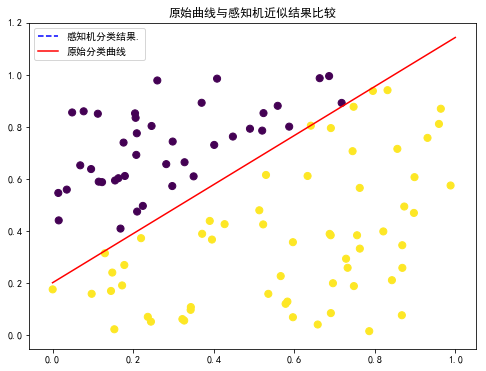

In [13]:
w=perceptron(xn,yn)

#利用权重值w 计算y=ax+b 中的a和b
bnew=-w[0]/w[2];
anew=-w[1]/w[2];
y=lambda x:anew*x+bnew;

#分割颜色
sep_color=(yn)/2.0;

plt.figure();
figa=plt.gca()

plt.scatter(xn[:,0],xn[:,1],c=sep_color.flatten(),s=50)
plt.plot(x,y(x),'b--',label='感知机分类结果.')
plt.plot(x,f(x),'r',label='原始分类曲线')
plt.legend()

plt.title('原始曲线与感知机近似结果比较')
